Interactive presentation of the evolutionary algotithm for solving minimum distance for traveling salesperson problem

In [57]:
# Generating cities
keys =list(map(chr, range(ord('A'), ord('J')+1)))

In [58]:
# Generating coordinates and putting them together to dict
import random
X_coordinates = [random.randrange(0,500) for i in keys]
Y_coordinates = [random.randrange(0,500) for i in keys]
points = {keys[i]: [X_coordinates[i], Y_coordinates[i]] for i in range(len(keys))}
points

{'A': [74, 250],
 'B': [487, 46],
 'C': [232, 298],
 'D': [416, 35],
 'E': [85, 4],
 'F': [88, 248],
 'G': [235, 334],
 'H': [296, 493],
 'I': [417, 338],
 'J': [270, 91]}

In [59]:
# creating function to permute cities
cities_list = list(points.keys())
roads_in_generation = 10
cities_in_road = len(points)
roads_list = []

for member in range(roads_in_generation):
    member = "A"
    while(len(member) != cities_in_road):
        random_letter = cities_list[random.randint(0, len(cities_list) - 1)]
        if random_letter not in member:
            member += random_letter
    roads_list.append(member)
roads_list

['AGDBIFCHEJ',
 'AJHEBDFIGC',
 'AFGICJBHDE',
 'AJCIEFHGDB',
 'AFBGIHCEJD',
 'AHEGFDJBCI',
 'AGIHDFJEBC',
 'ADBFIJGHEC',
 'ADFECHBIGJ',
 'AEIGBHCFDJ']

In [60]:
# creating function to calculate distance
import math
def calc_distance(sequence):
    dist = 0
    for index, element in enumerate(sequence):
        if index == 0:
            continue
        current_coordinates = points[element]
        previous_coordinates = points[keys[index-1]]
        x_diff = abs(current_coordinates[0] - previous_coordinates[0])
        y_diff = abs(current_coordinates[1] - previous_coordinates[1])
        temp = x_diff**2 + y_diff**2
        dist += int(math.sqrt(temp))
    return dist

In [61]:
# creating function to sort dict
def sort_dict(input):
    return dict(sorted(input.items(), key=lambda item: item[1]))

In [62]:
# dict report for current state
gen = roads_list
gen_1_dict = {element : calc_distance(element)  for element in gen}
gen_1_dict = sort_dict(gen_1_dict)
gen_1_dict


{'AJHEBDFIGC': 2010,
 'AFBGIHCEJD': 2104,
 'ADBFIJGHEC': 2123,
 'AGIHDFJEBC': 2207,
 'AEIGBHCFDJ': 2267,
 'AGDBIFCHEJ': 2298,
 'AHEGFDJBCI': 2319,
 'AJCIEFHGDB': 2469,
 'AFGICJBHDE': 2669,
 'ADFECHBIGJ': 3116}

In [63]:
number_of_parents = 6
parents = [key for key in gen_1_dict.keys()][0:number_of_parents]
parents

['AJHEBDFIGC',
 'AFBGIHCEJD',
 'ADBFIJGHEC',
 'AGIHDFJEBC',
 'AEIGBHCFDJ',
 'AGDBIFCHEJ']

In [64]:
# creating simple crossing over function
def cross_pair(parent1, parent2):
    child = ""
    part1 = ""
    part2 = ""

    gene1 = int(random.random() * len (parent1))
    gene2 = int(random.random() * len (parent2))

    cutpoint_start = min(gene1, gene2)
    cutpoint_end = max(gene1, gene2)

    for i in range(cutpoint_start, cutpoint_end):
        part1 += parent1[i]

    for i in parent2:
        if i not in part1:
            part2 += i

    child = part1 + part2
    return child

In [68]:
# crossing
child_list = []
for x in range(2):
    for i in range(6):
        parent1 = parents[i]
        parent2 = parents[(i + 1) % 6]
        child_list.append(cross_pair(parent1, parent2))
child_list


['DFIABGHCEJ',
 'HCEADBFIJG',
 'FIAGHDJEBC',
 'AGIHDFEBCJ',
 'IGBHCFADEJ',
 'AJHEBDFIGC',
 'FIGABHCEJD',
 'FBGIHCEADJ',
 'ADBFIJGHEC',
 'HDAEIGBCFJ',
 'HCFDAGBIEJ',
 'AJHEBDFIGC']

In [69]:
gen_2 = {element : calc_distance(element)  for element in child_list}
gen_2_dict = sort_dict(gen_2)
gen_2_dict

{'HCEADBFIJG': 1904,
 'AJHEBDFIGC': 2010,
 'AGIHDFEBCJ': 2048,
 'DFIABGHCEJ': 2088,
 'ADBFIJGHEC': 2123,
 'IGBHCFADEJ': 2132,
 'FIGABHCEJD': 2723,
 'FIAGHDJEBC': 2932,
 'HDAEIGBCFJ': 2947,
 'FBGIHCEADJ': 3017,
 'HCFDAGBIEJ': 3145}

#### Now let's add a bit of automation

In [73]:
input_gen = gen_2_dict

for epoch in range(10):
    parents = [key for key in input_gen.keys()][0:number_of_parents]
    print("Local min: ", input_gen[parents[0]])
    child_list = []
    for x in range(2):
        for i in range(6):
            parent1 = parents[i]
            parent2 = parents[(i + 1) % 6]
            child_list.append(cross_pair(parent1, parent2))
    gen_n = {element : calc_distance(element)  for element in child_list}
    input_gen = sort_dict(gen_n)        


Local min:  1904
Local min:  1370
Local min:  1370
Local min:  1370
Local min:  1842
Local min:  1842
Local min:  1617
Local min:  1625
Local min:  1583
Local min:  1686


In [74]:
import matplotlib.pyplot as plt

In [86]:
epochs = []
local_mins = []
input_gen = gen_1_dict
for epoch in range(100):
    parents = [key for key in input_gen.keys()][0:number_of_parents]
    local_mins.append(input_gen[parents[0]])
    epochs.append(epoch)
    child_list = []
    for x in range(2):
        for i in range(6):
            parent1 = parents[i]
            parent2 = parents[(i + 1) % 6]
            child_list.append(cross_pair(parent1, parent2))
    gen_n = {element : calc_distance(element)  for element in child_list}
    input_gen = sort_dict(gen_n) 

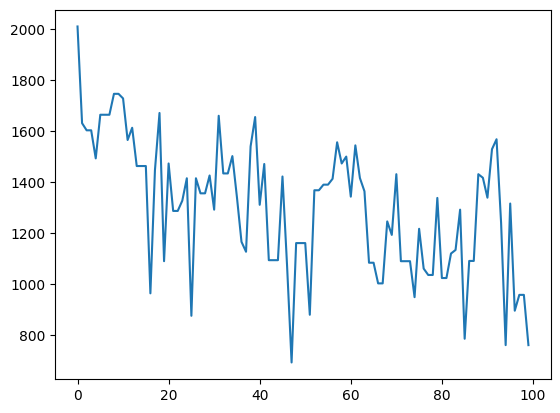

In [87]:
plt.plot(epochs, local_mins)

## Let's test this

In [89]:
epochs = []
local_mins = []
input_gen = gen_1_dict
for epoch in range(1000):
    parents = [key for key in input_gen.keys()][0:number_of_parents]
    local_mins.append(input_gen[parents[0]])
    epochs.append(epoch)
    child_list = []
    for x in range(2):
        for i in range(6):
            parent1 = parents[i]
            parent2 = parents[(i + 1) % 6]
            child_list.append(cross_pair(parent1, parent2))
    gen_n = {element : calc_distance(element)  for element in child_list}
    input_gen = sort_dict(gen_n) 

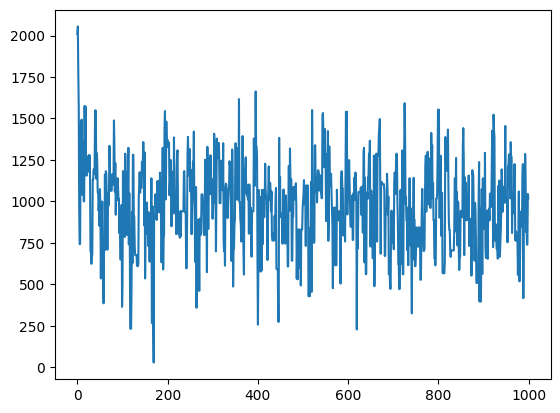

In [90]:
plt.plot(epochs, local_mins)

## That was good example of partial observation :)

### Further part will be relased soon